In [60]:
import numpy as np
import math
import cmath
from pylab import *
import sys, os
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.signal
#import lomb
import matplotlib.ticker as plticker
from matplotlib.ticker import ScalarFormatter
import astropy.io.ascii
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import random
import pdb
import pandas as pd

In [10]:
# python g_massradius.py $dir $targetname
jupmass = 1.89813e27 #kg
juprad = 7.1492e7#Equatorial radius from IAU resolution B3
earthmass = 5.9721986e24
earthrad = 6.3781e6#Equatorial radius from IAU resolution B3
tsun = 5777

#My colours
violet = '#5A068F'
lightpurple = '#EEE4F5'
gris = '#C6BECC'
grisfonce = '#848285'
lavande = '#AF8CBA'
bordeaux = '#8C0726'
bleu = '#5465AB'
vert = '#00752B'

ft = 36
fs = 18
lt = 20
ls = 30
mm = 10

In [16]:
# Nasa exoplanet archive
workdir = "/Users/Zoe/Documents/SOAP_2/Other_Stars/hd212657/MR"
datafile = workdir+"/planets_2021.04.28_13.49.50_updated_TRAPPIST.csv" ## replace this!
a = astropy.io.ascii.read(datafile)
a

bb = a['pl_bmassj']
n = bb.shape[0]

# Jessie's table
#datafile =workdir+"/20170228_Jessie.dat"


#  Contour lines ZS2013
datafile2 =workdir+"/20170228_zengsasselov.csv"
steps, fe100, fe50, rocky, h2o50, h2o100, coldh2  = \
np.loadtxt(datafile2, unpack=True, usecols=(0,1,11,21,31,41,42), skiprows=2)
l = rocky.shape[0]

datafile3 =workdir+"/earthlike.csv"
modelmass, earthlike= np.loadtxt(datafile3, unpack=True, skiprows=1)


In [141]:
# Cuts, limits in mass for the flux plot
minm = 0.2
maxm = 20.
minr = 0.7
maxr = 4.
mcut1 = 3.
mcut2 = 7.
minre = -0.8
maxre = 0.7

mcut01 = 1.
mcut02 = 4
mcut03 = 7
mcut04 = 10
mcut05 = 13

r1 = 1.0364*mcut01**0.2764
r2 = 1.0364*mcut02**0.2764
r3 = 1.0364*mcut03**0.2764
r4 = 1.0364*mcut04**0.2764
r5 = 1.0364*mcut05**0.2764

# Incident flux in Earth units
# (Tstar/Tsun)**4. * (Rstar/dist7b)**2.
# semi major axis
# ((theta(7) /365.25)**2. * Mstar )**(1./3.)
# sma = ((orb /365.25)**2. * mstar )**(1./3.)
a['st_teff'].fill_value = 0.
a['st_rad'].fill_value = -99.
a['pl_orbsmax'].fill_value = -99.
a['pl_orbper'].fill_value = -99.
a['st_mass'].fill_value = -99.
teff = a['st_teff'].filled()
rstar = a['st_rad'].filled()
sma = a['pl_orbsmax'].filled()
orb = a['pl_orbper'].filled()
mstar = a['st_mass'].filled()
flux = (teff/tsun)**4. * (rstar/((orb /365.25)**2. * mstar )**(1./3.))**2.



# Planet names
a['\ufeffpl_hostname'].fill_value = 0.
a['pl_letter'].fill_value = 0.
name = a['\ufeffpl_hostname'].filled()
letter = a['pl_letter'].filled()

# Planet mass and radius (m, r)
a['pl_bmassj'].fill_value = 0.
a['pl_radj'].fill_value = 0.
a['pl_bmassjerr1'].fill_value = 0.
a['pl_bmassjerr2'].fill_value = 0.
a['pl_radjerr1'].fill_value = 0.
a['pl_radjerr2'].fill_value = 0.
m = a['pl_bmassj'].filled()*jupmass/earthmass
r = a['pl_radj'].filled()*juprad/earthrad
meh = a['pl_bmassjerr1'].filled()*jupmass/earthmass
mel = a['pl_bmassjerr2'].filled()*jupmass/earthmass
reh = a['pl_radjerr1'].filled()*juprad/earthrad
rel = a['pl_radjerr2'].filled()*juprad/earthrad
pl_radlim = a['pl_radjlim']

a.keys()

/Users/Zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in power


['\ufeffpl_hostname',
 'pl_letter',
 'pl_name',
 'pl_discmethod',
 'pl_controvflag',
 'pl_pnum',
 'pl_orbper',
 'pl_orbpererr1',
 'pl_orbpererr2',
 'pl_orbperlim',
 'pl_orbsmax',
 'pl_orbsmaxerr1',
 'pl_orbsmaxerr2',
 'pl_orbsmaxlim',
 'pl_orbeccen',
 'pl_orbeccenerr1',
 'pl_orbeccenerr2',
 'pl_orbeccenlim',
 'pl_orbincl',
 'pl_orbinclerr1',
 'pl_orbinclerr2',
 'pl_orbincllim',
 'pl_bmassj',
 'pl_bmassjerr1',
 'pl_bmassjerr2',
 'pl_bmassjlim',
 'pl_bmassprov',
 'pl_radj',
 'pl_radjerr1',
 'pl_radjerr2',
 'pl_radjlim',
 'pl_dens',
 'pl_denserr1',
 'pl_denserr2',
 'pl_denslim',
 'pl_ttvflag',
 'pl_kepflag',
 'pl_k2flag',
 'pl_nnotes',
 'ra_str',
 'ra',
 'dec_str',
 'dec',
 'st_dist',
 'st_disterr1',
 'st_disterr2',
 'st_distlim',
 'gaia_dist',
 'gaia_disterr1',
 'gaia_disterr2',
 'gaia_distlim',
 'st_optmag',
 'st_optmagerr',
 'st_optmaglim',
 'st_optband',
 'gaia_gmag',
 'gaia_gmagerr',
 'gaia_gmaglim',
 'st_teff',
 'st_tefferr1',
 'st_tefferr2',
 'st_tefflim',
 'st_mass',
 'st_masserr1

/Users/Zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: MatplotlibDeprecationWarning: The 'nonposx' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


55 Cnc e mass=7.990187767700827, radius=1.8718997820667598, precision: 0.06757736806630933
mel: -0.3305407827529379, rel: -0.03362694219281604, alpha: 1,color: 80, zorder: 44.39356083025152
CoRoT-7 b mass=4.077729079538648, radius=1.6813471096408021, precision: 0.32030839182284454
mel: -1.020226839073972, rel: -0.11208980730938681, alpha: 377.99902045532053,color: 223, zorder: 1
EPIC 249893012 b mass=8.749795912681135, radius=1.9503626471833304, precision: 0.17918900115514358
mel: -1.080614097461528, rel: -0.07846286511657076, alpha: 1,color: 194, zorder: 16.742099016460116
EPIC 249893012 c mass=14.670925511418861, radius=3.6653366990169487, precision: 0.17751311366825487
mel: -1.891074670557674, rel: -0.13450776877126416, alpha: 1,color: 194, zorder: 16.90015986991556
EPIC 249893012 d mass=10.180020453439042, radius=3.9455612172904155, precision: 0.2588890570941178
mel: -2.4186686122594785, rel: -0.12329878804032549, alpha: 578.62863337275,color: 218, zorder: 1
GJ 1132 b mass=1.659060

K2-285 c mass=15.678439243463874, radius=3.5308289302456846, precision: 0.15559002474057804
mel: -2.129445427350658, rel: -0.07846286511657076, alpha: 1,color: 192, zorder: 19.281441756963723
K2-291 b mass=6.490041138283647, radius=1.5916752637932927, precision: 0.23199334052031997
mel: -1.1600710163925227, rel: -0.06725388438563208, alpha: 720.5701569869459,color: 210, zorder: 1
K2-36 b mass=3.8997455811332196, radius=1.4347495335601512, precision: 0.3262423467740092
mel: -1.0996837580049668, rel: -0.07846286511657076, alpha: 364.3733818286589,color: 225, zorder: 1
K2-36 c mass=7.799491162266439, radius=3.194559508317524, precision: 0.4096552864887956
mel: -2.3010723722416064, rel: -0.30264247973534436, alpha: 231.09480411406795,color: 229, zorder: 1
K2-38 b mass=19.069660543438726, radius=1.9055267242595757, precision: 0.728201082537644
mel: -9.534830271719363, rel: -0.33626942192816045, alpha: 73.13489933213864,color: 240, zorder: 1
K2-38 c mass=9.90033209880194, radius=2.4211398378

Kepler-25 b mass=8.740261082409416, radius=2.746200279079977, precision: 0.2787943637134898
mel: -2.3201420327850455, rel: -0.03362694219281604, alpha: 498.9526450991329,color: 220, zorder: 1
Kepler-26 b mass=5.1202038559132985, radius=2.779827221272793, precision: 0.1726708659509022
mel: -0.6102291373900393, rel: -0.11208980730938681, alpha: 1,color: 192, zorder: 17.37409483342158
Kepler-26 c mass=6.200817953374826, radius=2.7237823176180993, precision: 0.1717059216445412
mel: -0.6515467352341565, rel: -0.12329878804032549, alpha: 1,color: 187, zorder: 17.47173289812614
Kepler-276 c mass=16.527039137646895, radius=2.903126009313118, precision: 0.8345956136789366
mel: -3.4961044329637665, rel: -0.280224518273467, alpha: 55.676908477218504,color: 235, zorder: 1
Kepler-276 d mass=16.209211461922916, radius=2.80224518273467, precision: 0.8561081650769479
mel: -4.449587460135703, rel: -0.2690155375425283, alpha: 52.913931420631386,color: 237, zorder: 1
Kepler-289 b mass=7.310036541651512, 

TOI-776 c mass=5.301365631075966, radius=2.0176165315689625, precision: 0.3938830488077788
mel: -1.7989046445977197, rel: -0.13450776877126416, alpha: 249.97278375201608,color: 230, zorder: 1
TOI-824 b mass=18.465787959563166, radius=2.9255439707749957, precision: 0.2249427903123555
mel: -1.8751832867714748, rel: -0.19055267242595758, alpha: 766.4488064372119,color: 194, zorder: 1
TRAPPIST-1 b mass=1.376193835884828, radius=1.115966121572255, precision: 0.06110097038800754
mel: -0.0689686056321034, rel: -0.011993609382104389, alpha: 1,color: 88, zorder: 49.09905654442468
TRAPPIST-1 c mass=1.3078608856041725, radius=1.0970117351562376, precision: 0.05562063991287204
mel: -0.05593767092742027, rel: -0.011993609382104389, alpha: 1,color: 66, zorder: 53.93681203055924
TRAPPIST-1 d mass=0.3880675920589781, radius=0.7879913453849894, precision: 0.05055262978814199
mel: -0.012013886142366398, rel: -0.009998410811997304, alpha: 1,color: 22, zorder: 59.34409372118763
TRAPPIST-1 e mass=0.6919108

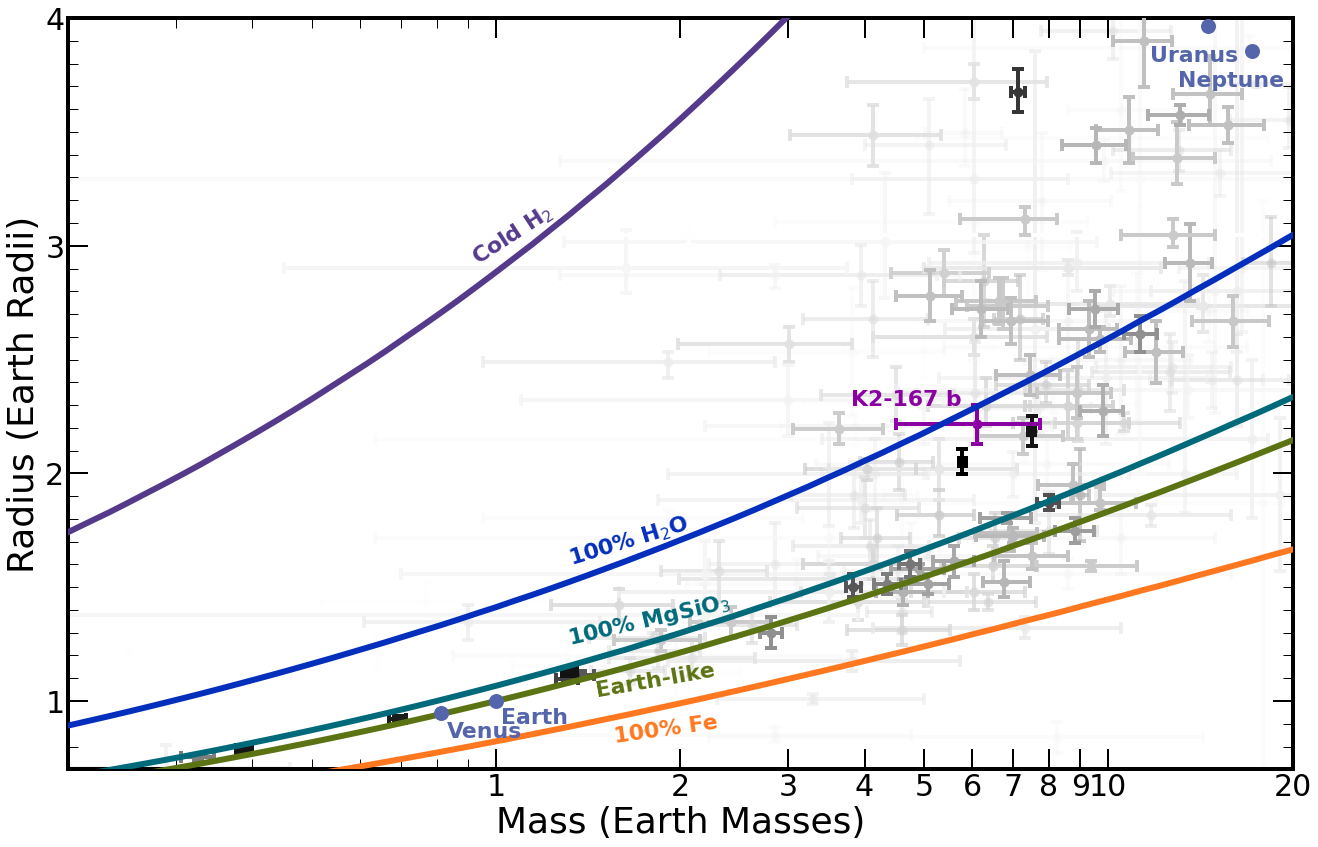

In [166]:
# ----------------------------------------------------------------
# Adding KOI-280b to m, r, meh/l, reh/l, flux, names, letter
# My KOI-280b:
###
#mk = 4.7
#rk = 2.213
#melk = 2.8
#mehk = 3.1
#relk = 0.082
#rehk = 0.082
#fk = 139.
#nk = 'KOI-280'
#lk = 'b'
#
#m = np.append (m, mk)
#r = np.append (r, rk)
#meh = np.append (meh, mehk)
#mel = np.append (mel, melk)
#reh = np.append (reh, rehk)
#rel = np.append (rel, relk)
#flux = np.append (flux, fk)
#name = np.append (name, nk)
#letter = np.append (letter, lk)
###


# ----------------------------------------------------------------
# ----------------------------------------------------------------
# Calculate the transparency
# Do a first pass to compute the normalisation factors.
alpha = []
gauss1 = []
gauss2 = []
gauss3 = []
gauss4 = []
gauss5 = []
rrock = []
rexcess = []
proba_rocky = []
ptot = 1000 # 10000 made no difference


#  Then add KOI-280
# alpha = np.append(alpha, 1./(sqrt(mehk*mehk + melk*melk + rehk*rehk + relk*relk)))
# Calculate normalisation coefs


good = np.where((mel != 0) & (meh !=0) & (rel != 0)  & (reh != 0) 
                & (m < maxm) & (m > minm) & (r < maxr) & (r > minr)
               & (pl_radlim == 0))

mel = mel[good]
meh = meh[good]
rel = rel[good]
reh = reh[good]
m = m[good]
r = r[good]
name = name[good]
letter = letter[good]
pl_radlim = pl_radlim[good]

alphas = 1. /(abs(meh)/m + abs(mel)/m + abs(reh)/r + abs(rel)/r)
massprecisions = 0.5*(abs(meh) + abs(mel))/m
radiusprecisions = 0.5*(abs(reh) + abs(rel))/r
precisions = np.sqrt(massprecisions**2 + radiusprecisions**2 * 9.0)

alphamax = np.max(alphas)


rc('axes', linewidth=4)
# ----------------------------------------------------------------
# Make the mass radius plot
do_mrplot = 1
if do_mrplot == 1:
    bestm = []
    bestr = []
    bestf = []
    bestn = []
    bestl = []
    

    figure2 = figure(figsize=(20,12))
    ax1 = plt.subplot(111)
    ax1.set_xscale("log", nonposx='clip')
    ax1.set_xticks([1,2,3,4,5,6,7,8,9,10,20])
    ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #ax1.set_yticks([1.0,1.5,2.0,2.5, 3,3.5,4])
    ax1.set_yticks([1,2,3,4])
    ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    xy = mcut1,0.5

    ax1.minorticks_on()
    ax1.tick_params('both', length=20, width=2, which='major', direction='in', right =1, top = 1)
    ax1.tick_params('both', length=10, width=1, which='minor', direction='in', right =1, top = 1)	

    width, height = mcut2-mcut1,5
    #p = patches.Rectangle(xy, width, height, facecolor="#C6BECC", edgecolor='#C6BECC', alpha=0.35)
    #plt.gca().add_patch(p)

    for i in range(0,len(m)-1):
        if  m[i] < maxm and r[i] < maxr:
        # and mel[i] / m[i] < 0.2 and meh[i] / m[i] < 0.2:

            # Check that we have the error bars
            if mel[i] == 0. or meh[i] == 0. \
            or rel[i] == 0. or reh[i] == 0.:
                # do not include in plot!
                beta = 1.
            else:
                # Transparency of the points proportional to size of error bars:
                beta = 1. /(abs(meh[i])/m[i] + abs(mel[i])/m[i] + abs(reh[i])/r[i] + abs(rel[i])/r[i])**2
                beta = beta/alphamax
        thisalpha = alphas[i]/alphamax
        thisalpha = 1. / (precisions[i]/np.max(precisions))
        #print precisions[i]
        thiscolorin = 255 - int(np.floor(255*(alphas[i]/alphamax)))
        
        
        #if thisalpha
        #thiscolorin = 255 - int(np.floor(255*(alphas[i]/alphamax)))
        #print thiscolorin
        thislevel = hex(thiscolorin).split('x')[1]
        if len(thislevel) == 1:
            thislevel = '0'+thislevel
        thiscolor = '#'+thislevel+thislevel+thislevel
        #print thiscolor
        
        thiszorder = 3/precisions[i]
        if precisions[i] < 0.2: 
            thisalpha = 1
        if precisions[i] >= 0.2: 
            thisalpha = thisalpha**2
            thiszorder = 1

        # if beta > 0.65:
        #     plt.text(1.05*m[i], 1.01*r[i], name[i]+letter[i], fontsize=fs)
        # Plot!
        err_mass = [m[i]+mel[i], m[i]+meh[i]]
        err_rad = [r[i]+rel[i], r[i]+reh[i]]
        #pdb.set_trace()
        #plt.errorbar([m[i],m[i]], [r[i],r[i]], xerr=[[mel[i], meh[i]],[mel[i], meh[i]]], yerr=[[rel[i],reh[i]],[rel[i],reh[i]]], \
        #if thiscolorin<85:
        #    plt.text(m[i], r[i], name[i]+letter[i])
        plt.errorbar(m[i], r[i], xerr=np.abs(np.reshape([mel[i], meh[i]],[2,1])), 
                     yerr=np.abs(np.reshape([rel[i],reh[i]],[2,1])), 
                     fmt = 'o', ms = mm, color=thiscolor, ecolor=thiscolor, capsize=6, elinewidth=4, 
                     alpha = thisalpha, markeredgecolor = 'none', capthick = 4,zorder = thiszorder)
        print(name[i] + ' '+ letter[i] + ' mass=' + str(m[i]) +', radius='+str(r[i])+", precision: "+str(precisions[i]))
        print("mel: "+str(mel[i])+ ", rel: "+str(rel[i])+", alpha: "+str(thisalpha)+",color: "+str(thiscolorin)+", zorder: "+str(thiszorder))
        #if precisions[i] <= 0.2: plt.text(1.05*m[i], 1.01*r[i], name[i]+letter[i], fontsize=fs)
        
    waspcolor = '#8b00a3'#'#49007a'#'#6800AD'#'#db2323'
    # Add a new planet
    planet_mass_new = 6.117 # in earth masses 
    planet_radius_new = 2.216 # in earth radii
    plt.errorbar(planet_mass_new,planet_radius_new, xerr=1.614 , yerr=0.0863, fmt = 'o', ms = mm, color=waspcolor, markeredgecolor = 'none',ecolor=waspcolor, capsize=6,\
    capthick = 4, elinewidth=4, zorder = 100)	
    plt.text(3.8, 2.3, 'K2-167 b', size=22, weight = 'semibold', color = waspcolor, zorder = 100)
    
    
    #waspcolor = '#49007a'#'#6800AD'#'#db2323'
    #plt.errorbar(13.1, 3.576,xerr=1.5, yerr=.046, fmt = 'o', ms = mm, color=waspcolor, markeredgecolor = 'none',ecolor=waspcolor, capsize=6,\
    #capthick = 4, elinewidth=4, zorder = 100)	
    #plt.text(11.5, 3.4, 'WASP-47 d', size=22, weight = 'semibold', color = waspcolor, zorder = 3)
    #plt.errorbar(6.83, 1.81,xerr=.66, yerr=.027, fmt = 'o', ms = mm, color=waspcolor, markeredgecolor = 'none',ecolor=waspcolor, capsize=6,\
    #capthick = 4, elinewidth=4, zorder = 100)
    #plt.text(4.8, 1.87, 'WASP-47 e', size=22, weight = 'semibold', color = waspcolor, zorder = 3)
    #neptune: 3.8538, 17.148
    #uranus: 3.9658, 14.5357
    plt.errorbar( 17.148, 3.8538,xerr=0, yerr=0, fmt = 'o', ms = mm*1.5, color=bleu, markeredgecolor = 'none', zorder = 1)	
    plt.text(13, 3.7, 'Neptune', size=22, weight = 'semibold', color = bleu, zorder = 100)
    plt.errorbar(14.5357, 3.9658,xerr=0, yerr=0, fmt = 'o', ms = mm*1.5, color=bleu, markeredgecolor = 'none', zorder = 101)	
    plt.text(11.7, 3.81, 'Uranus', size=22, weight = 'semibold', color = bleu, zorder = 100)

    plt.errorbar(1, 1,xerr=0, yerr=0, fmt = 'o', ms = mm*1.5, color=bleu, markeredgecolor = 'none', zorder = 100)	
    plt.text(1.02, 0.9, 'Earth', size=22, weight = 'semibold', color = bleu, zorder = 101)
    plt.errorbar(.815, 0.9488,xerr=0, yerr=0, fmt = 'o', ms = mm*1.5, color=bleu, markeredgecolor = 'none', zorder = 101)	
    plt.text(0.815 * 1.02, 0.84, 'Venus', size=22, weight = 'semibold', color = bleu, zorder = 101)
    # fe100, fe50, rocky, h2o50, h2o100, coldh2
    kk = 3
    ax1.plot(steps, fe100, ls = '-', color='#FF781F', lw = kk*2, zorder = 100)
    plt.text(1.55, 0.82, '100% Fe', size=22, weight = 'semibold', color = '#FF781F', zorder = 80, rotation = 8)

    #ax1.plot(steps, fe50, '--', color='#FF781F', lw = kk*2, zorder = 2)
    ax1.plot(steps, rocky, color='#006A7A', lw = kk*2, zorder = 100)
    plt.text(1.3, 1.25, r'100% MgSiO$_3$', size=22, weight = 'semibold', color = '#006A7A', zorder = 80, rotation = 13)
    #ax1.plot(steps, h2o50, '--', color='#006A7A', lw = kk*2, zorder = 2)
    ax1.plot(steps, h2o100, color='#042FBD', lw = kk*2, zorder = 100)
    plt.text(1.3, 1.60, r'100% H$_2$O', size=22, weight = 'semibold', color = '#042FBD', zorder = 100, rotation = 17)

    ax1.plot(modelmass, earthlike, color='#5B7312', lw = kk*2, zorder = 100)
    plt.text(1.45, 1.02, 'Earth-like', size=22, weight = 'semibold', color = '#5B7312', zorder = 100, rotation = 10)

    ax1.plot(steps, coldh2, color='#553A8C', lw = kk*2, zorder = 100)
    # scatter(bestm, bestr, c=bestf, cmap=plt.cm.rainbow, edgecolor='none', s=150)
    plt.text(.9, 2.92, r'Cold H$_2$', size=22, weight = 'semibold', color = '#553A8C', zorder = 100, rotation = 33)

    #plt.text(6.8, 2.04, '55 Cnc e', size=22, weight = 'semibold', color = '#000000', zorder = 4)
    plt.tight_layout(rect=(.03, .07, .98, .98))	

    # figlegend(bestf,('Flux'),'upper left')
    plt.tick_params(labelsize=ls)
    xlabel('Mass (Earth Masses)', fontsize=ft)
    ylabel('Radius (Earth Radii)', fontsize=ft)
    loc = plticker.MultipleLocator(base=.1)
    plt.gca().axes.yaxis.set_minor_locator(loc)
    xlim([minm,maxm])
    ylim([minr,maxr])
    # tight_layout()
    # subplots_adjust(hspace=.45, wspace=.45)
    figure2.savefig("/Users/Zoe/Documents/SOAP_2/Other_Stars/hd212657/MR/massradius.png")
    print('Ready!')
